In [1]:
# Import library 
import pandas as pd

We'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

In [2]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Data Science\class Folder\tvmarketing.csv")
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
#Overall summary of the data set
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


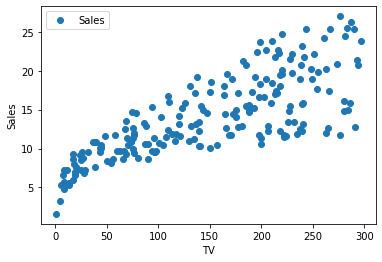

In [4]:
import matplotlib.pyplot as plt
data.plot(x='TV',y='Sales',style='o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

Equation of linear regression. 

y = c+m1x1+m2x2+...+mnxn
 
y   is the response
c  is the intercept
m1 is the coefficient for the first feature
mn is the coefficient for the nth feature

In our case:
y = c+m1×TV
 
The  m values are called the model coefficients or model parameters.

# Preparing data

The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.

However, X can be a dataframe as Pandas is built over NumPy.

In [5]:
X = data.iloc[:,0:1]
Y = data.iloc[:,-1]

In [6]:
X.size, Y.size

(200, 200)

# Splitting Data into Training and Testing Sets

random_state is the seed used by the random number generator, it can be any integer.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7 , random_state=0000)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
print(regressor.coef_)

[0.04581434]


In [11]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [12]:
y_pred

,Predicted
0,10.481163
1,9.601527
2,11.452427
3,20.583225
4,15.108411
5,9.885576
6,7.709395
7,18.310834
8,8.401192
9,16.363724


In [13]:
X_test

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2
182,56.2
5,8.7
146,240.1
12,23.8
152,197.6


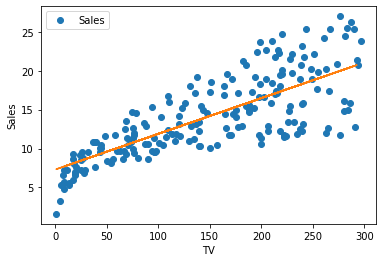

In [14]:
import matplotlib.pyplot as plt
data.plot(x='TV',y='Sales',style='o')
plt.plot(X_test,regressor.predict(X_test))
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [15]:
m = regressor.coef_
b = regressor.intercept_

In [16]:
# y = mx + b 
m*210.8+b

array([16.9684735])

In [17]:
from sklearn import metrics 
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.0575465794300083
Mean Squared Error: 7.497479593464674
Root Mean Squared Error: 2.7381525876883988


 this mse =7.9 means that this model is not able to match the 7.9 percent of the values
 
 r2 means that your model is 72% is accurate on test data .

In [18]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))

R2 Score: 0.725606346597073


In [19]:
r2 =  metrics.r2_score(y_test, y_pred)

In [20]:
X_test.shape

(60, 1)

In [21]:
#Adjusted R2 Score
1-((1-r2)*(40-1)/(40-1-1))

0.7183854609812065